-0.48917214824884653

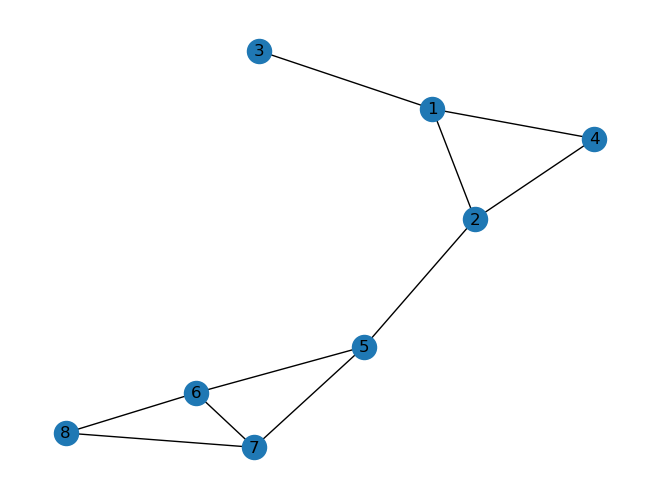

In [22]:
import networkx as nx
import math
import itertools
import numpy as np
G = nx.Graph()
edgeList = [(1, 2),(1, 3),(1, 4),(2, 4),(2, 5),(5, 6),(5, 7),(6, 7),(6, 8),(7, 8)]
G.add_edges_from(edgeList)
nx.draw(G, with_labels=True)

# score based on mutual information
def s(x , y, prior, likelihood):
 # common neighbors
 CN = nx.common_neighbors(G, x, y)
 # prior (x, y)
 priorXY = - np.log2(prior(x, y, G))
 # sum over neighbors
 cnMI = 0
 for z in CN:
   # degree of z
   kz = G.degree(z)
  #  coeffZ = 1 / (kz * (kz-1))
   coeffZ = 1 / (math.exp(kz) * (math.exp(kz)-1))
   # sum over edges = neighbors of z
   zMI = 0
   for m, n in itertools.combinations(G.neighbors(z), 2):
     priorInfo = - np.log2(prior(m, n, G))
     likelihoodInfo = - np.log2(likelihood(z, G))
     # combine mutual information
     zMI += 2 * (priorInfo - likelihoodInfo)
   # add average mutual information per neighbor
   cnMI += coeffZ * zMI
 return (cnMI - priorXY)


def prior(m, n, G):
 kn = G.degree(n)
 km = G.degree(m)
 M = G.number_of_edges()
 
 return 1 - math.comb(M-kn, km)/math.comb(M, km)

def likelihood(z, G):
 kz = G.degree(z)
 N_triangles = nx.triangles(G, z)
 N_triads = math.comb(kz, 2)
 
 return N_triangles / N_triads

s(1, 1, prior, likelihood)

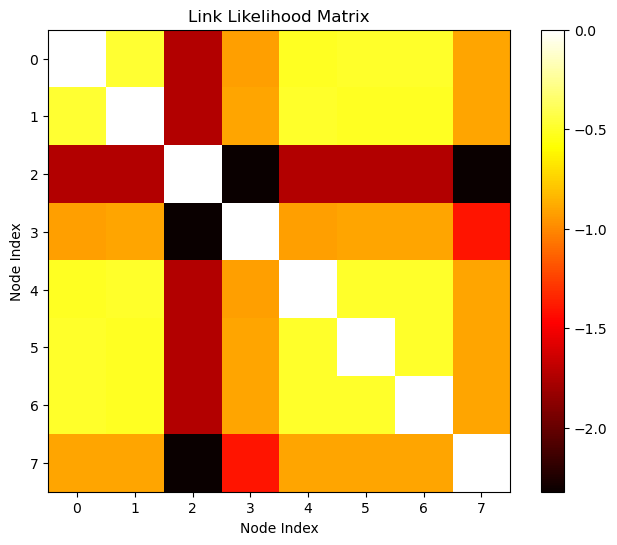

In [24]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the link likelihood matrix for each node
link_likelihood_matrices = {}

# Iterate over all nodes in the graph
for node in G.nodes():
    # Initialize an empty matrix to store the link likelihood values for the current node
    likelihood_matrix = np.zeros((len(G), len(G)))
    
    # Iterate over all pairs of nodes in the graph
    for i, node_i in enumerate(G.nodes()):
        for j, node_j in enumerate(G.nodes()):
            # Skip the calculation if node_i is equal to node_j
            if node_i == node_j:
                continue
            
            # Calculate the likelihood score for the pair of nodes (node_i, node_j)
            likelihood_score = s(node_i, node_j, prior, likelihood)
            
            # Store the likelihood score in the matrix
            likelihood_matrix[i, j] = likelihood_score
    
    # Store the likelihood matrix for the current node in the dictionary
    link_likelihood_matrices[node] = likelihood_matrix

# Get the link likelihood matrix for any node (e.g., the first node)
first_node_matrix = next(iter(link_likelihood_matrices.values()))

# Plot the link likelihood matrix
plt.figure(figsize=(8, 6))
plt.title("Link Likelihood Matrix")
plt.imshow(first_node_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel("Node Index")
plt.ylabel("Node Index")
plt.show()

